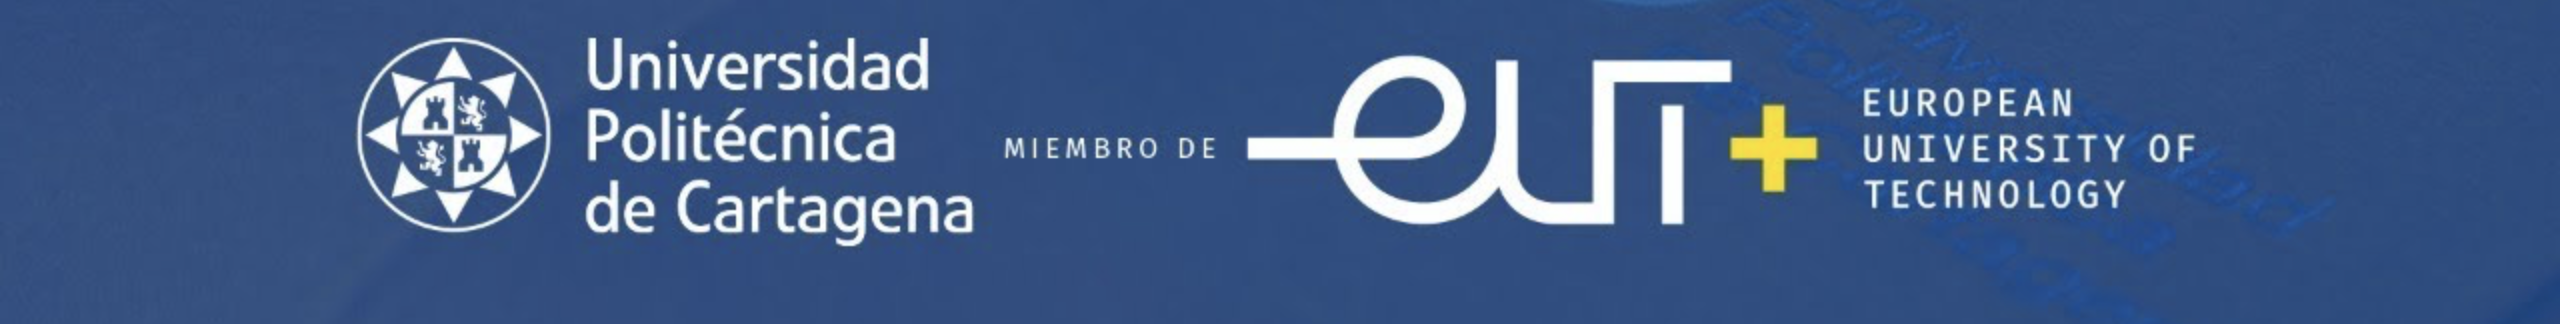
**MACHINE LEARNING II**

# PRÁCTICA 2. SESIÓN 1  
# DATOS SECUENCIALES Y MODELOS DE MARKOV 

Los objetivos de aprendizaje de esta práctica son:
1) Abordar de forma práctica la generación, procesamiento y análisis de datos secuenciales.
2) Explorar los modelos de Markov, incluyendo el cálculo de probabilidades de transición y la estimación de parámeros a partir de datos reales.
3) Desarrollar habilidades para visualizar cadenas de Markov y analizar secuencias temporales mediante herramientas matemáticas y estadísticas.
4) Aplicar modelos de Markov para realizar predicciones complejas y análisis de secuencias en diversos escenarios de la vida real.


Los datos secuenciales son aquéllos que tienen un orden temporal o espacial, y que pueden ser analizados como una sucesión de elementos. Por ejemplo, una serie temporal, un texto, el ADN, o una señal de audio, son datos secuenciales.

Las cadenas de Markov son un tipo de modelo probabilístico que se utiliza para describir sistemas que cambian de estado de forma aleatoria, dependiendo esta transición únicamente del estado en que nos encontramos y no de los anteriores. Por ejemplo, el clima, el comportamiento de un animal o el movimiento de un robot son sistemas que se pueden modelar mediante cadenas de Markov.


Antes de comenzar con la práctica, debemos importar una serie de librerías que faciliten el uso de las funciones objeto de estudio de la práctica. Para ello, en el siguiente cuadro, ejecuta los siguientes comandos:

- import numpy as np 
- import matplotlib.pyplot as plt
- import pandas as pd
- import networkx as nx 
- from scipy.stats import norm

Siendo las tres primeras ya bien conocidas, se pasará directamente a la explicación de las siguientes:

"Networkx" es una librería de Python para la creación, manipulación y estudio de estructuras dinámicas y funciones de grafos. Se usa fundamentalmente para representar redes. Un ejemplo de su uso sería:


In [1]:
import networkx as nx

# Crear un grafo vacío
G = nx.Graph()

# Añadir nodos
G.add_node(1)
G.add_node(2)

# Añadir una arista (enlace) entre los nodos 1 y 2
G.add_edge(1, 2)

# Mostrar los nodos y aristas
print("Nodos:", G.nodes())
print("Aristas:", G.edges())


Nodos: [1, 2]
Aristas: [(1, 2)]


Por otro lado, "scipy.stats" es un módulo que contiene una gran variedad de funciones estadísticas; en este caso, se usará una clase en concreto dentro de este módulo, llamada “norm” que, como su nombre indica, representa la distribución normal (o distribución gaussiana). Es posible utilizarla para calcular probabilidades, generar valores aleatorios, calcular funciones de densidad de probabilidad o funciones de distribución acumulativa, entre otras. Un ejemplo de su uso es el siguiente:



In [2]:
from scipy.stats import norm

# Calcular la probabilidad de que una variable aleatoria normal estándar sea menor que 1.96
probabilidad = norm.cdf(1.96)
print("Probabilidad de que Z < 1.96:", probabilidad)

# Calcular el valor de la función de densidad de probabilidad (PDF) en x = 0
pdf_value = norm.pdf(0)
print("Valor de la PDF en x = 0:", pdf_value)

# Generar 10 valores aleatorios de una distribución normal con media 0 y desviación estándar 1
random_values = norm.rvs(size=10)
print("Valores aleatorios:", random_values)

Probabilidad de que Z < 1.96: 0.9750021048517795
Valor de la PDF en x = 0: 0.3989422804014327
Valores aleatorios: [ 0.45983253 -1.94993599  0.22287581 -0.90204853  0.12196776 -1.77847816
 -0.21120137  0.70972449 -0.19788067  0.18167985]


Estas dos librerías nos serán de utilidad para numerosas aplicaciones de análisis de datos, estadística o aprendizaje máquina, entre otros.

In [3]:
#Importe las librerías necesarias

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx 
from scipy.stats import norm


                            EJERCICIO 1.1. GENERACIÓN DE DATOS SECUENCIALES CON PATRONES COMPLEJOS                                      

En este ejercicio será necesario llamar a la función “np” en varias ocasiones: para definir el espacio y los puntos que se van a usar (y posteriormente aleatorizarlos), así como para representar (preferiblemente) una función seno, todo ello con el tamaño adecuado.

Se comenzará con la generación de secuencias multimodales. Para ello, se va a modelar como sería el tiempo meteorológico a lo largo del año, mediante una serie de simulaciones. 
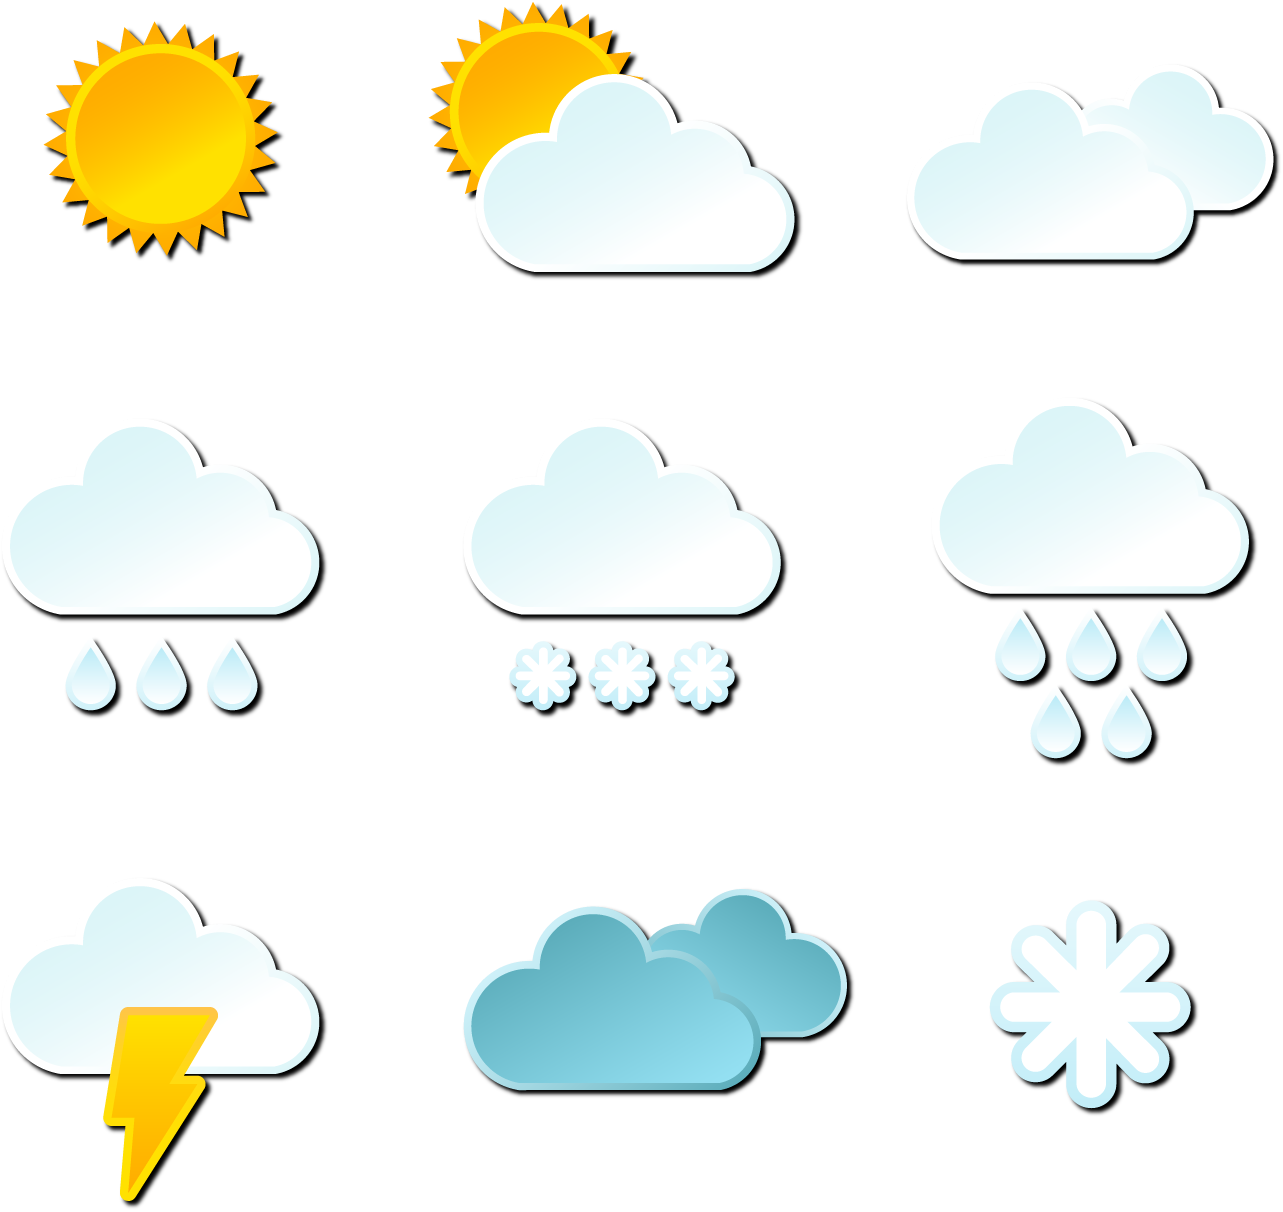

Para realizar lo indicado, se pide:
- Genere una secuencia de 365 puntos de datos que modele las temperaturas máximas diarias a lo largo del año, incorporando patrones estacionales mediante la combinación de señales sinusoidales y ruido gaussiano.


In [4]:
dias = np.linspace(0, 365, 365)
temperaturas = 20+10* np.sin(np.pi * dias / 182.5) + np.random.normal(0, 2, dias.size)

Una vez haya implementado lo anterior, será hora de visualizar el resultado: en el cuadro de código inferior, indique el código necesario para ello.

Adicionalmente, estudie los estadísticos media, varianza y autocorrelación. 

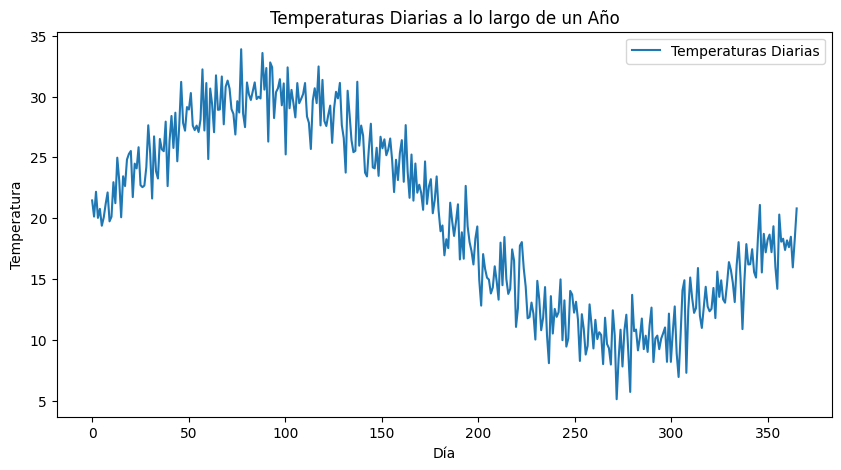

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(dias, temperaturas, label="Temperaturas Diarias")
plt.title("Temperaturas Diarias a lo largo de un Año")
plt.xlabel("Día")
plt.ylabel("Temperatura")
plt.legend()
plt.show()


                                 EJERCICIO 1.2. PROCESAMIENTO DE DATOS SECUENCIALES                                            

Como se observa, la gráfica obtenida en el ejercicio anterior es ciertamente ruidosa. El objetivo de este ejercicio es normalizar los datos y "suavizar" su representación mediante filtros de ventana deslizante. 
- Aplique lo indicado para normalizar y suavizar la gráfica.
- Para el suavizado, utilice la función "np.convolve", consistiendo la respuesta al impulso del filtro en 25 valores consecutivos iguales a 1/25.
- Compare los resultados visualmente y discuta las diferencias antes y después de aplicar el suavizado.

Para normalizar la gráfica, la fórmula empleada será la siguiente:

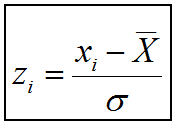

donde “z_i” es el resultado de la normalización, “x_i” el valor de cada punto en un instante determinado, “X” la media de los valores y “σ” corresponde a la desviación típica. Fácilmente calculable con “np.std”.

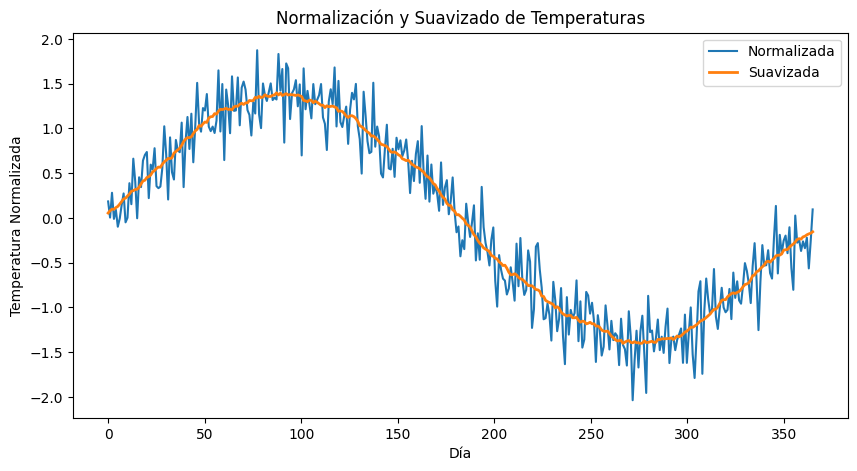

In [6]:
temperaturas_norm = (temperaturas - np.mean(temperaturas)) / np.std(temperaturas)
temperaturas_suavizadas = np.convolve(temperaturas_norm, np.ones(25)/25, mode='same')

plt.figure(figsize=(10, 5))
plt.plot(dias, temperaturas_norm, label="Normalizada")
plt.plot(dias, temperaturas_suavizadas, label="Suavizada", linewidth=2)
plt.title("Normalización y Suavizado de Temperaturas")
plt.xlabel("Día")
plt.ylabel("Temperatura Normalizada")
plt.legend()
plt.show()

                            EJERCICIO 1.3. PROCESAMIENTO DE DATOS SECUENCIALES CON OUTLIERS                                                          

Para este ejercicio, suponga que en los datos generados anteriormente han existido una serie de anomalías con respecto a la medición de temperaturas. Aún desconociendo si el problema es humano o del propio ruido del medidor, se han obtenido algunos datos tan dispares como 60ºC o -20ºC (los cuales no son propios del sudeste de España, donde nos encontramos). Estos "picos" o valores anómalos se llaman "outliers", y son datos que difieren del rango esperado en una secuencia. Lo que se pretende con este ejercicio es lo siguiente:

- Cree un código que introduzca una serie de outliers aleatoramiente dentro del conjuno original de datos (asegúrese de que estos datos difieran notoramiente del rango esperado).
- Muestre en pantalla la gráfica obtenida.

OPCIONAL: Destaque en la gráfica, mediante "plot.scatter", los outliers.

Los outliers representan valores que difieren notablemente de los demás valores medidos, no es necesario que el alumno los introduzca manualmente, para ello, se usará “np.random.choice” con los valores preferidos (en este caso, -20ºC y 60ºC) que se irán esparciendo aleatoriamente a lo largo de los puntos establecidos. 
En el siguiente paso, deberá de corregir los outliers o errores, para ello, deberá de definir una función que sea capaz de detectar aquellos valores que superen superior o inferiormente a unos valores de temperatura “normales” en nuesta zona. Para ello, el código deberá empezar de la siguiente manera:


In [7]:
def imputar_outliers(temperaturas, lower_bound= 5, upper_bound=40):
    corrected_temperaturas = temperaturas.copy()
    for i in range(len(temperaturas)):
        if temperaturas[i] < lower_bound or temperaturas[i] > upper_bound:
            # Reemplazar outlier con la media de los vecinos no atípicos
            vecinos = []
            if i > 0:
                vecinos.append(temperaturas[i - 1])
            if i < len(temperaturas) - 1:
                vecinos.append(temperaturas[i + 1])
            if len(vecinos) > 0:
                corrected_temperaturas[i] = np.mean(vecinos)
    return corrected_temperaturas

Por último, cuando estos outliers se hayan corregido, será conveniente mostrar por pantalla la gráfica resultante tras haber realizado el procesado.

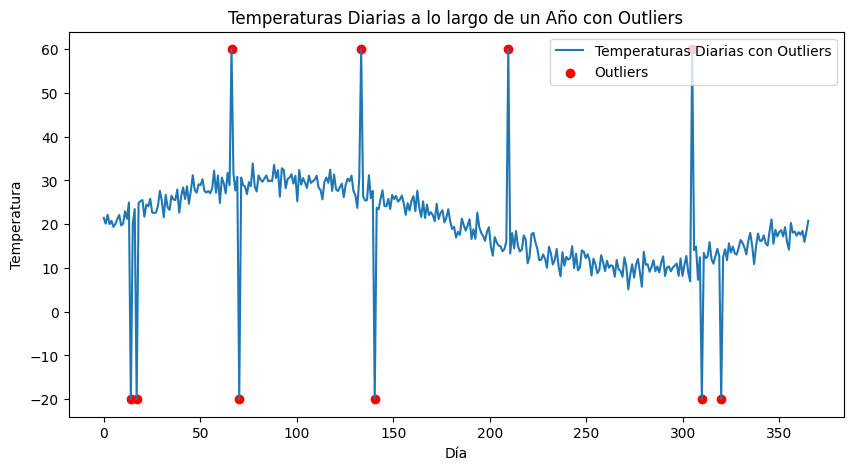

In [8]:
# Implemente aquí el código con outliers

num_outliers = 10  # Número de outliers a introducir
outliers_indices = np.random.choice(dias.size, num_outliers, replace=False)
temperaturas[outliers_indices] = np.random.choice([-20, 60], num_outliers)

# Crear la gráfica
plt.figure(figsize=(10, 5))
plt.plot(dias, temperaturas, label="Temperaturas Diarias con Outliers")
plt.scatter(dias[outliers_indices], temperaturas[outliers_indices], color='red', label='Outliers')
plt.title("Temperaturas Diarias a lo largo de un Año con Outliers")
plt.xlabel("Día")
plt.ylabel("Temperatura")
plt.legend()
plt.show()


Si ha implementado correctamente el código, podrá observar cómo los outliers son claramente detectables ya que no se ajustan al comportamiento secuencial esperado. Aún así, para aclarar más este concepto, muestre por pantalla la normalización y suavizado de este nuevo registro de temperaturas.  

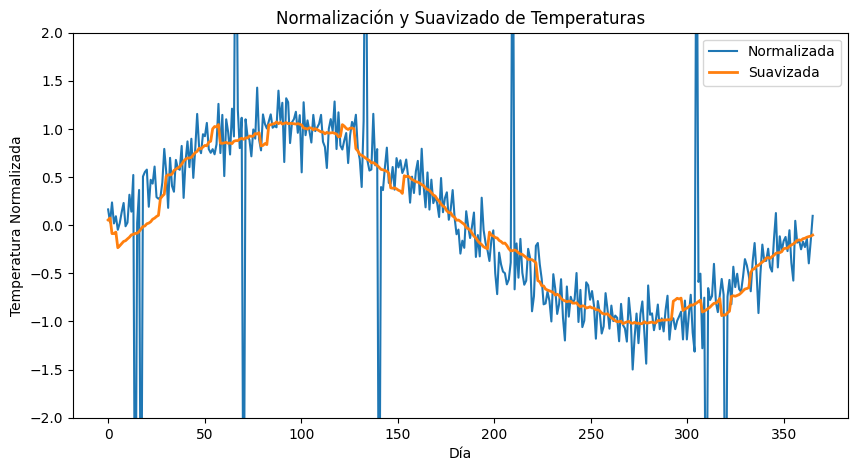

In [9]:
temperaturas_norm = (temperaturas - np.mean(temperaturas)) / np.std(temperaturas)
temperaturas_suavizadas = np.convolve(temperaturas_norm, np.ones(25)/25, mode='same')

plt.figure(figsize=(10, 5))
plt.plot(dias, temperaturas_norm, label="Normalizada")
plt.plot(dias, temperaturas_suavizadas, label="Suavizada", linewidth=2)
plt.title("Normalización y Suavizado de Temperaturas")
plt.xlabel("Día")
plt.ylabel("Temperatura Normalizada")
plt.legend()
plt.ylim(-2, 2)
plt.show()



El siguiente paso sería, partiendo del conjunto de datos con outliers, intentar corregir las anomalías mediante el método de imputación por media (esto es, reemplazar los valores anómalos por la media de sus vecinos inmediatos). Para ello:

- Implemente el código necesario para ello.
- De nuevo, muestre la gráfica resultante.

NOTA: Considere que un valor será anómalo cuando éste supere los 40ºC o sea inferior a 5ºC.

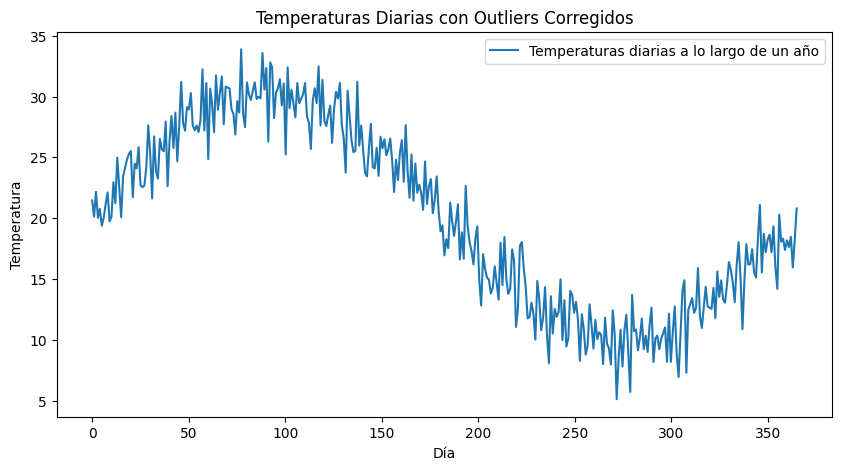

In [10]:
# Función para identificar y corregir outliers por imputación de la media
def imputar_outliers(temperaturas, lower_bound= 5, upper_bound=40):
    corrected_temperaturas = temperaturas.copy()
    for i in range(len(temperaturas)):
        if temperaturas[i] < lower_bound or temperaturas[i] > upper_bound:
            # Reemplazar outlier con la media de los vecinos no atípicos
            vecinos = []
            if i > 0:
                vecinos.append(temperaturas[i-1])
            if i < len(temperaturas) - 1:
                vecinos.append(temperaturas[i+1])
            if len(vecinos) > 0:
                corrected_temperaturas[i] = np.mean(vecinos)
    return corrected_temperaturas

# Corregir los outliers
temperaturas_corregidas = imputar_outliers(temperaturas)

# Crear la gráfica después de la corrección
plt.figure(figsize=(10, 5))
plt.plot(dias, temperaturas_corregidas, label="Temperaturas diarias a lo largo de un año")
plt.title("Temperaturas Diarias con Outliers Corregidos")
plt.xlabel("Día")
plt.ylabel("Temperatura")
plt.legend()


plt.show()


                                     EJERCICIO 1.4. MODELOS DE MARKOV DE PRIMER ORDEN                                                  

En esta parte de la práctica, se tiene como objetivo trabajar con los modelos de Markov de primer orden.
Se parte de un estudio de los posibles estados a lo largo de una ventana de observación, donde se obtuvo:

- Día 1: Soleado
- Día 2: Soleado
- Día 3: Nublado
- Día 4: Lluvioso
- Día 5: Lluvioso
- Día 6: Soleado
- Día 7: Soleado
- Día 8: Nublado
- Día 9: Nublado
- Día 10: Lluvioso
- Día 11: Lluvioso
- Día 12: Soleado
- Día 13: Soleado
- Día 14: Nublado

Se busca ahora la forma de establecer relaciones entre los estados meteorológicos teniendo en cuenta el estado actual y el anterior para determinar el próximo estado. Para ello, realice lo siguiente:

- Construya la matriz de transición: calcule la probabilidad de transición de un estado a otro basado en las frecuencias observadas.
- Intente predecir el tiempo para los 3 próximos días (sabiendo que hoy es soleado) a partir de la matriz de transición.

En este ejercicio será necesario seguir un orden específico y unas pautas necesarias, explicadas a continuación:

1) Definir el histórico de datos en el orden proporcionado.

2) Asignar un índice numérico a cada dato para la creación de un diccionario, teniendo en cuenta cada posible estado (el orden es indiferente pero tenga en cuenta que la matriz de transición será distinta según asigne los índices, para mayor uniformidad, siga el orden ‘Soleado’, ‘Nublado’, ‘Lluvioso’).

3) Para inicializar la matriz de transición, deberá de crear una matriz de ceros de tamaño N x N, donde “N” corresponde al número de estados posibles.

4) Cree un bucle que recorra el historial de tiempo y cuente cuántas veces ocurre cada transición de un estado a otro. Para poder asociar cada día con el siguiente, use “zip(historico,historico[1:])”.

5) Para poder convertir las cuentas de transiciones en probabilidades, será necesario normalizar; para ello, divida cada fila de la matriz por la suma de sus elementos.

6)	Por último, para crear la función que “prediga el tiempo", debe de usar la matriz de transición, empezando en un estado inicial y seleccionando el siguiente estado basado en las probabilidades en la fila correspondiente: "def predecir_tiempo(matriz_transicion, estado_inicial, dias)".

In [11]:
# Datos históricos del tiempo
historico = ['Soleado', 'Soleado', 'Nublado', 'Lluvioso', 'Lluvioso','Soleado', 'Soleado', 'Nublado',
              'Nublado', 'Lluvioso', 'Lluvioso', 'Soleado', 'Soleado', 'Nublado']

# Estados y su índice correspondiente
estados = ['Soleado', 'Nublado', 'Lluvioso']
estado_indices = {estado: idx for idx, estado in enumerate(estados)}

# Inicializar la matriz de transición
n_estados = len(estados)
matriz_transicion = np.zeros((n_estados, n_estados))

# Contar transiciones
for (hoy, manana) in zip(historico, historico[1:]):
    i = estado_indices[hoy]
    j = estado_indices[manana]
    matriz_transicion[i, j] += 1

# Normalizar para obtener probabilidades
matriz_transicion = matriz_transicion / matriz_transicion.sum(axis=1, keepdims=True)

print("Matriz de Transición:")
print(matriz_transicion)

# Función para predecir el tiempo de los próximos días
def predecir_tiempo(matriz_transicion, estado_inicial, dias):
    estado_actual = estado_indices[estado_inicial]
    predicciones = []
    
    for _ in range(dias):
        siguiente_estado = np.random.choice(n_estados, p=matriz_transicion[estado_actual])
        predicciones.append(estados[siguiente_estado])
        estado_actual = siguiente_estado
    
    return predicciones

# Predicción para los próximos 3 días a partir de un estado inicial "Soleado"
estado_inicial = 'Soleado'
dias_prediccion = 3
predicciones = predecir_tiempo(matriz_transicion, estado_inicial, dias_prediccion)

print(f"Predicción para los próximos {dias_prediccion} días desde un estado inicial '{estado_inicial}':")
print(predicciones)


Matriz de Transición:
[[0.5        0.5        0.        ]
 [0.         0.33333333 0.66666667]
 [0.5        0.         0.5       ]]
Predicción para los próximos 3 días desde un estado inicial 'Soleado':
['Soleado', 'Soleado', 'Nublado']


Alternativamente, podríamos haber hecho uso de la librería "hmmlearn", que aunque está diseñada para trabajar con modelos de Markov ocultos (HMM), se le puede "engañar" para que funcione con modelos de Markov "estándar", ignorando los estados ocultos. En este apartado, deberá reproducir el ejercicio propuesto anteriormente pero, esta vez, haciendo uso de dicha librería.

Los pasos por seguir serán los siguientes:

1)	Definir los datos del histórico y proporcionarles un índice correspondiente.

2)	Convertir la secuencia de estados en una secuencia de índices usando el diccionario anterior.

3)	Convertir la secuencia de índices en un "np.array" y formatear de manera adecuada con “reshape” para que pueda ser utilizado por "hmmlearn".

4)	Crear un modelo de Markov de primer orden con “n_componentes” igual al número de estados. Será necesario configurar algunos parámetros del modelo: “n_iter”, número máximo de iteraciones para el algoritmo de ajuste; “tol”, tolerancia para la convergencia; “init_params”, parámetros que no se inicializarán automáticamente. El código sería el siguiente:


In [12]:
from hmmlearn import hmm
# Crear y configurar el modelo de Markov de primer orden
model = hmm.MultinomialHMM(n_components=len(estados), n_iter=100, tol=0.01, init_params="")

MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


5)	Seguidamente, se inicializará la matriz de transición con todo a cero, y las probabilidades iniciales de cada estado.

6)	Contar transiciones y normalizar.

7)	Inicializar la matriz de emisión. Como en este caso no se está trabajando con modelos ocultos, cada estado solo “emite a sí mismo”. Para ello, se deberá usar:


In [13]:
# Inicializar la matriz de emisión como una matriz de identidad
# ya que en este caso cada estado solo se "emite" a sí mismo.
model.emissionprob_ = np.eye(len(estados))


8)	Una vez completado todo lo anterior, muestre por pantalla la matriz de transición.

*1) IMPORTE LA LIBERÍA*

*2) REHAGA EL CÓDIGO ANTERIOR USANDO LA LIBERÍA MENCIONADA* 

*(Para comprobar que el código es correcto, muestre por pantalla la matriz de emisión)*

In [14]:
import numpy as np
from hmmlearn import hmm

# Datos históricos del tiempo
historico = ['Soleado', 'Soleado', 'Nublado', 'Lluvioso', 'Lluvioso', 'Soleado', 'Soleado', 'Nublado',
             'Nublado', 'Lluvioso', 'Lluvioso', 'Soleado', 'Soleado', 'Nublado']

# Estados y su índice correspondiente
estados = ['Soleado', 'Nublado', 'Lluvioso']
estado_indices = {estado: idx for idx, estado in enumerate(estados)}

# Convertir la secuencia histórica a índices
secuencia_indices = [estado_indices[estado] for estado in historico]

# Preparar datos para hmmlearn
X = np.array(secuencia_indices).reshape(-1, 1)

# Crear y configurar el modelo de Markov de primer orden
model = hmm.MultinomialHMM(n_components=len(estados), n_iter=100, tol=0.01, init_params="")

# Inicializar la matriz de transición
model.startprob_ = np.zeros(len(estados))
model.startprob_[0] = 1.0  # Suponemos que siempre comenzamos en el primer estado (Soleado)
model.transmat_ = np.zeros((len(estados), len(estados)))

# Contar transiciones y normalizar para obtener probabilidades
for hoy, manana in zip(secuencia_indices, secuencia_indices[1:]):
    model.transmat_[hoy, manana] += 1

model.transmat_ = model.transmat_ / model.transmat_.sum(axis=1, keepdims=True)

# Inicializar la matriz de emisión como una matriz de identidad
# ya que en este caso cada estado solo se "emite" a sí mismo.
model.emissionprob_ = np.eye(len(estados))

print("Matriz de Transición:")
print(model.transmat_)


MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


Matriz de Transición:
[[0.5        0.5        0.        ]
 [0.         0.33333333 0.66666667]
 [0.5        0.         0.5       ]]


Llegados a este punto, responda a las siguientes preguntas:

- Si hoy está nublado, ¿cuál es la probabilidad de que mañana haya nubes pero los dos días siguientes sean soleados?

Para responder a esta cuestion, cree una función que calcule la probabilidad de una secuencia de estados y llámela "calcular_probabilidad_secuencia". Dicha función tomará como argumentos "estado_inicial", "secuencia" y "matriz_transicion".

In [15]:
# Función para calcular la probabilidad de una secuencia de estados
def calcular_probabilidad_secuencia(estado_inicial, secuencia, matriz_transicion):
    probabilidad = 1.0
    estado_actual = estado_indices[estado_inicial]
    
    for estado_siguiente in secuencia:
        siguiente_indice = estado_indices[estado_siguiente]
        probabilidad *= matriz_transicion[estado_actual, siguiente_indice]
        estado_actual = siguiente_indice
    
    return probabilidad

# Pregunta 1
estado_inicial = 'Nublado'
secuencia = ['Nublado', 'Soleado', 'Soleado']
probabilidad_nublado_sol_sol = calcular_probabilidad_secuencia(estado_inicial, secuencia, matriz_transicion)
print(f"Probabilidad de que mañana haya nubes y los dos días siguientes sean soleados (empezando desde Nublado): {probabilidad_nublado_sol_sol:.4f}")

Probabilidad de que mañana haya nubes y los dos días siguientes sean soleados (empezando desde Nublado): 0.0000


- Si hoy hace sol, ¿qué probabilidad hay de que los 3 días siguiente sean también soleados?

In [16]:
# Pregunta 2
estado_inicial = 'Soleado'
secuencia = ['Soleado', 'Soleado', 'Soleado']
probabilidad_sol_sol_sol = calcular_probabilidad_secuencia(estado_inicial, secuencia, matriz_transicion)
print(f"Probabilidad de tener 3 días soleados a continuación del actual (empezando desde Soleado): {probabilidad_sol_sol_sol:.4f}")

Probabilidad de tener 3 días soleados a continuación del actual (empezando desde Soleado): 0.1250


- Si hoy está nublado, ¿que probabilidad hay de que los dos días siguientes no haga sol?

*NOTA: Si lo cree conveniente, primero estudie esta pregunta con un diagrama de árbol.*

In [17]:
# Obtener las probabilidades de transición
transmat = model.transmat_

# Día 1: Probabilidad de que no haga sol
prob_no_sol_dia1 = transmat[1, 1] + transmat[1, 2]

# Día 2: Probabilidad de que no haga sol condicionado a no haber hecho sol en el Día 1
prob_no_sol_dia2 = (transmat[1, 1] * (transmat[1, 1] + transmat[1, 2])) + \
                   (transmat[1, 2] * (transmat[2, 1] + transmat[2, 2]))

# Probabilidad conjunta
prob_no_sol_2_dias = prob_no_sol_dia1 * prob_no_sol_dia2

print(f"La probabilidad de que no haga sol en los dos días siguientes, dado que hoy está nublado, es: {prob_no_sol_2_dias:.4f}")


La probabilidad de que no haga sol en los dos días siguientes, dado que hoy está nublado, es: 0.6667


                                        EJERCICIO 1.5. MODELOS DE MARKOV DE SEGUNDO ORDEN                                              

La principal diferencia con respecto a los modelos de Markov de primer orden es que ahora se tendrán en cuenta 2 estados anteriores, y no únicamente el estado inmediatamente anterior. Se hará uso de un nuevo diccionario: “from collections import defaultdict”, el cual se inicializa cde forma predeterminada: "defaultdict(lambda: np.zeros(n_estados))". Los pasos a seguir son muy similares a los vistos hasta este momento en la práctica, destacando que ahora, para emparejar los días consecutivos, se usará el siguiente código: “zip(historico, historico[1:], historico[2:])”

Para este ejercicio, los datos del histórico serán distintos:

historico = ['Soleado', 'Soleado', 'Nublado', 'Lluvioso', 'Lluvioso', 'Nublado', 'Nublado', 'Soleado', 'Lluvioso', 'Soleado', 'Lluvioso',                     'Lluvioso', 'Soleado', 'Nublado', 'Soleado', 'Soleado', 'Nublado', 'Nublado', 'Lluvioso', 'Soleado', 'Nublado']

- Construya la matriz de transición: calcule la probabilidad de transición de un estado a otro basado en las frecuencias observadas.
- Intente predecir el tiempo para los 3 próximos días a partir de la matriz de transición, sabiendo que hoy está nublado y que ayer fue un día soleado.

In [18]:
import numpy as np
from collections import defaultdict

# Datos históricos del tiempo
historico = ['Soleado', 'Soleado', 'Nublado', 'Lluvioso', 'Lluvioso', 'Nublado', 'Nublado', 'Soleado', 'Lluvioso', 'Soleado', 'Lluvioso',
                'Lluvioso', 'Soleado', 'Nublado', 'Soleado', 'Soleado', 'Nublado', 'Nublado', 'Lluvioso', 'Soleado', 'Nublado']

# Estados y su índice correspondiente
estados = ['Soleado', 'Nublado', 'Lluvioso']
estado_indices = {estado: idx for idx, estado in enumerate(estados)}

# Inicializar la matriz de transición de segundo orden
n_estados = len(estados)
transiciones = defaultdict(lambda: np.zeros(n_estados))

# Contar transiciones de segundo orden
for (anteayer, ayer, hoy) in zip(historico, historico[1:], historico[2:]):
    i = (estado_indices[anteayer], estado_indices[ayer])
    j = estado_indices[hoy]
    transiciones[i][j] += 1

# Normalizar para obtener probabilidades
for key in transiciones:
    transiciones[key] = transiciones[key] / transiciones[key].sum()

print("Matriz de Transición de Segundo Orden:")
for key, value in transiciones.items():
    print(f"{key}: {value}")

# Función para predecir el tiempo de los próximos días
def predecir_tiempo_2do_orden(transiciones, estado_inicial_1, estado_inicial_2, dias):
    estado_actual = (estado_indices[estado_inicial_1], estado_indices[estado_inicial_2])
    predicciones = []
    
    for _ in range(dias):
        if estado_actual in transiciones:
            siguiente_estado = np.random.choice(n_estados, p=transiciones[estado_actual])
            predicciones.append(estados[siguiente_estado])
            estado_actual = (estado_actual[1], siguiente_estado)
        else:
            siguiente_estado = np.random.choice(n_estados)
            predicciones.append(estados[siguiente_estado])
            estado_actual = (estado_actual[1], siguiente_estado)
    
    return predicciones

# Predicción para los próximos 7 días a partir de dos estados iniciales "Soleado" y "Nublado"
estado_inicial_1 = 'Soleado'
estado_inicial_2 = 'Nublado'
dias_prediccion = 3
predicciones = predecir_tiempo_2do_orden(transiciones, estado_inicial_1, estado_inicial_2, dias_prediccion)

print(f"Predicción para los próximos {dias_prediccion} días desde estados iniciales '{estado_inicial_1}' y '{estado_inicial_2}':")
print(predicciones)

Matriz de Transición de Segundo Orden:
(0, 0): [0. 1. 0.]
(0, 1): [0.33333333 0.33333333 0.33333333]
(1, 2): [0.5 0.  0.5]
(2, 2): [0.5 0.5 0. ]
(2, 1): [0. 1. 0.]
(1, 1): [0.5 0.  0.5]
(1, 0): [0.5 0.  0.5]
(0, 2): [0.5 0.  0.5]
(2, 0): [0.         0.66666667 0.33333333]
Predicción para los próximos 3 días desde estados iniciales 'Soleado' y 'Nublado':
['Lluvioso', 'Soleado', 'Lluvioso']
